We will be using Principal Component Analysis (PCA) to further reduce the dimensions (number of variables) of the dataset. We are aware that there is a shortcut to do this using the scikit-learn library, but we will be showing the complete method so that we can flex on what we researched and hopefully we can get some more marks :)

From the data_exploration notebook, we have two dataframes:
1. final_data1 (the bigger dataframe where only irrelevant variables are dropped)
2. final_data (the more simplified dataframe where both irrelevant variables and highly correlated variables are dropped)

We will be performing PCA on both dataframes to investigate whether dropping highly correlated variables help in dimensionality reduction. We will then be using the model with fewer dimensions in our clustering.

First, we are going to import all the necessary libraries.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [18]:
# read in dataframes from data_exploration.ipynb
%store -r final_data
%store -r final_data1

dataframes = [final_data1, final_data]

In [19]:
#find the dimensions of the dataframes
x=1
for df in dataframes:
    print("Dimensions of Dataframe",x,":", df.shape,"\n")
    print("Column titles in Dataframe",x,":")
    n=0
    for col in df:
        print(col)
        n+=1
    print("\n")
    print("There are a total of", n, "columns in Dataframe",x,".\n\n\n")
    x+=1

Dimensions of Dataframe 1 : (191, 30) 

Column titles in Dataframe 1 :
GDP per capita (current US$)
Economy: Agriculture (% of GVA)
Agricultural production index (2004-2006=100)
Food production index (2004-2006=100)
International trade: Exports (million US$)
International trade: Imports (million US$)
Population growth rate (average annual %)
Urban population (% of total population)
Urban population growth rate (average annual %)
Fertility rate, total (live births per woman)
Infant mortality rate (per 1000 live births
Mobile-cellular subscriptions (per 100 inhabitants)
Individuals using the Internet (per 100 inhabitants)
Energy production, primary (Petajoules)
Energy supply per capita (Gigajoules)
Education: Secondary gross enrol. ratio (f/m per 100 pop.)-female
Education: Secondary gross enrol. ratio (f/m per 100 pop.)-male
Population age distribution (0-14 / 60+ years, %)-0-14 years
Population age distribution (0-14 / 60+ years, %)-60+ years
International migrant stock (000/% of total

As can be seen, both dataframes have 191 entries (countries), and Dataframe 1 has 30 columns while Dataframe 2 has 17 columns. 

The columns are made of country, region, and the rest are metrics. We will be trying to reduce the metrics variables into a smaller number of dimensions (principal components, PC) without losing too much information (hopefully).

Let's begin!!!

Step 1: Data pre-processing. For this we will first be dropping the columns country and region. 

In [20]:
#dropping the columns country and region and using these to replace the old dataframes
x=1
for df in dataframes:
    print("Dataframe",x,":")
    df_dropped = df.drop(labels=['country','Region'],axis=1)
    
    #for verification that 2 columns are dropped
    print(df_dropped.shape)
    print("\n\n")
    n=x-1
    dataframes[n]=df_dropped
    x+=1

Dataframe 1 :
(191, 28)



Dataframe 2 :
(191, 15)





Then, we will be doing a standard scaling of the data. This ensures that the data has a mean of 0 and a sd of 1. This is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (taken from scikit_learn).

In [22]:
#importing necessary libraries for standard scaling
from sklearn.preprocessing import StandardScaler

def dataframe_scaler(df):
    scaler = StandardScaler()
    
    #computing the mean and sd
    scaler.fit(df)
    
    #perform standardisation by centering and scaling
    return scaler.transform(df)

scaled_dataframes = []
for df in dataframes:
    scaled_dataframes.append(dataframe_scaler(df))
    
#verification
x=1
for df in scaled_dataframes:
    print("Dataframe",x,":")
    print(df)
    print("\n\n")
    x+=1

Dataframe 1 :
[[-0.57992492  0.94172334  0.27654231 ... -2.09675955  0.55517885
  -0.55373925]
 [-0.4362874   0.86667536  0.64193527 ...  0.43398198  0.71267679
  -0.45498555]
 [-0.42902646  0.0161316   1.69751491 ... -0.50188546  0.8876745
  -0.42061526]
 ...
 [-0.55927462  0.22459821  0.7231337  ... -2.35802255 -0.42830826
  -0.54791169]
 [-0.55052645 -0.31741497  2.46890004 ... -1.64052417  0.01618591
  -0.54598101]
 [-0.56850572  0.08284092 -0.77903734 ... -0.57207551 -0.24281069
  -0.552493  ]]



Dataframe 2 :
[[-0.57992492  0.94172334  0.27654231 ... -2.09675955  0.55517885
  -0.55373925]
 [-0.4362874   0.86667536  0.64193527 ...  0.43398198  0.71267679
  -0.45498555]
 [-0.42902646  0.0161316   1.69751491 ... -0.50188546  0.8876745
  -0.42061526]
 ...
 [-0.55927462  0.22459821  0.7231337  ... -2.35802255 -0.42830826
  -0.54791169]
 [-0.55052645 -0.31741497  2.46890004 ... -1.64052417  0.01618591
  -0.54598101]
 [-0.56850572  0.08284092 -0.77903734 ... -0.57207551 -0.24281069
  -

Principal components (PC) are like new axes that retains the highest variance when the points are projected onto it.

PCA deals with eigen vectors and values. Eigenvectors are simply unit vectors in the direction of the PCs, and an eigenvalue is the sum of squared distances of projected points on the PC. Simply put, the higher the eigenvalue, the more the information is retained and thus the better the PC.

To derive the eigen vectors and values, we need the covariance matrix of the variables (against one another).

Step 2: Find covariance matrix. This can be done using the numpy covariance library.

In [23]:
def covmat(df):
    #first transpose the dataset, then apply the covariance method
    return np.cov(df.T)

covmats=[]
for df in scaled_dataframes:
    covmats.append(covmat(df))
    
#verification
x=1
for matrix in covmats:
    print("Dataframe",x,":")
    print(matrix)
    print("\n\n")
    x+=1

Dataframe 1 :
[[ 1.00526316 -0.43020619 -0.1727339  -0.17858384  0.22747494  0.24377812
  -0.12524221  0.42589456 -0.26590614 -0.39026074 -0.41825748  0.26500529
   0.65387997  0.09181908  0.46388961  0.43396337  0.47412052 -0.46846141
   0.43964233  0.22077021  0.05714922  0.41007474  0.38316034 -0.07334951
   0.49776068  0.35132856 -0.01562194  0.90126474]
 [-0.43020619  1.00526316  0.30217148  0.32584845 -0.22046177 -0.2184778
   0.28735885 -0.5658535   0.50164204  0.65667304  0.69453824 -0.53032884
  -0.69856162 -0.12504008 -0.41891468 -0.67349273 -0.66402787  0.67542355
  -0.52756236 -0.18286704 -0.09218858 -0.47269293 -0.63173475  0.25557201
  -0.64505173 -0.54612248 -0.07033553 -0.4281149 ]
 [-0.1727339   0.30217148  1.00526316  0.99925653 -0.05315576 -0.05874764
   0.33624092 -0.0591598   0.38820112  0.26669521  0.3163706  -0.07743012
  -0.27386902  0.04224159 -0.0252275  -0.22524175 -0.22802087  0.29990552
  -0.34079565 -0.05523848  0.02877285 -0.01524699 -0.21219453  0.266595

Step 3: Now that we have the covariance matrix, we can perform an eigendecomposition on the covariance matrix to get our eigenvectors and values. This can be done using the numpy.linalg.eig method.

In [24]:
#this handy method returns eigen values and vectors

def eigendecomp(matrix):
    eigvals,eigvecs = np.linalg.eig(matrix)
    return [eigvals,eigvecs]

#eigvalvecs is an array of 2 arrays, each containing eigen values and vectors for each dataframe
eigvalvecs=[]
for matrix in covmats:
    eigvalvecs.append(eigendecomp(matrix))

x=0
for eigvalvec in eigvalvecs:
    print("Dataframe",x+1,":")
    print("Eigenvectors:\n", eigvalvec[1])
    print("\n")
    print("Eigenvalues:\n", eigvalvec[0])
    print("\n\n")
    x+=1

Dataframe 1 :
Eigenvectors:
 [[ 1.67302224e-01 -4.39156853e-02 -1.56601190e-01  3.76325405e-01
   4.13408778e-01  7.60311597e-02 -1.21995312e-01  1.82178472e-03
  -2.33579638e-01 -4.81336510e-02  2.84323034e-01 -5.94235896e-02
   4.70587998e-02  1.90820646e-01 -1.21069776e-01  4.93450964e-03
  -2.26780992e-01  7.73560759e-02  1.95417771e-02  2.28521767e-02
   9.82237546e-02 -4.49892775e-01 -3.12907938e-01  1.27505959e-01
   1.63347449e-01 -7.32215392e-02 -3.49824371e-02  8.77159150e-04]
 [-2.17902488e-01 -4.17359428e-02  7.64945715e-02 -5.69024126e-02
   1.53406816e-01 -1.15414851e-01  4.97955171e-02 -2.26017386e-01
  -5.39878121e-02 -3.00116157e-01 -6.04163511e-02  7.62543668e-01
  -1.48337098e-03  1.32221842e-01 -2.04510065e-01 -1.77533607e-01
  -1.42832172e-01 -2.29282715e-01 -3.04883783e-02  2.60180756e-03
  -5.25834443e-02 -3.20336246e-02  5.88187786e-02  4.61849417e-03
  -3.84077557e-03 -1.27536231e-02 -1.19145742e-02 -2.89044500e-02]
 [-1.02201132e-01 -1.25263760e-01 -3.80324155

Step 4: Deciding which PCs (eigenvectors) can be dropped and which to keep. The higher the eigenvalue, the more we should keep that eigenvector.

As for how many PCs we should keep, this depends on the explained variance, which tells us how much information each PC retains. This can be calculated for each PC by taking the eigenvalue of that PC divided by the sum total of eigenvalues.

In [27]:
def descending_eigval(eigvalvec):
    
    #creating a list of eigenvalue, eigenvector tuple pairs
    eigpairs = [(eigvalvec[0][i], eigvalvec[1][:,i]) for i in range(len(eigvalvec[0]))]
    
    #it will help to sort the eigenvectors in descending order of eigenvalues
    eigpairs.sort(key = lambda x: x[0], reverse = True)

    return eigpairs


eigpairs_by_df = []
for eigvalvec in eigvalvecs:
    eigpairs_by_df.append(descending_eigval(eigvalvec))


#printing out the eigenvalues to check if they are sorted by descending order (0th item)
print("Checking for descending order of eigenvalues:\n")
x=0
for eigpairs in eigpairs_by_df:
    print("Dataframe",x+1,":")
    for eigpair in eigpairs:
        print(eigpair[0])
    print("\n\n")
    x+=1

Checking for descending order of eigenvalues:

Dataframe 1 :
12.142307217965875
3.8679305329097957
2.467857922238112
1.716863976872617
1.2809759121368345
1.0486937790807451
0.9282434256878487
0.6432744646324643
0.5688663155615864
0.5368092036865907
0.4714739118311
0.4042173877712749
0.3684806419205776
0.3361921573088786
0.26393411143181494
0.21577467560350275
0.17597669414893627
0.15171162822347808
0.1403290724891747
0.12338340995535489
0.11283170922711418
0.04853747958177542
0.0453330060549649
0.03469437446628043
0.023801332282648777
0.01419961874909926
0.009434295439522922
0.005240163794680887



Dataframe 2 :
5.78261751725064
1.8747103134833092
1.5438320629602396
1.251619093826127
0.961308620322833
0.812549291192389
0.7018109710017619
0.507076751715279
0.458044826610581
0.39078084859133494
0.35692114696020205
0.25235660224624373
0.09461221884090985
0.05490490053469724
0.035802202884499715





Very nice!

In [29]:
def cumulative_explained_var(eigpairs):
    
    #calculating explained variance of the PCs by taking each eigenvalue over sum of eigenvalue
    explained_vars = []
    eigvals_sum = 0
    for eigpair in eigpairs:
        eigvals_sum += eigpair[0]
    
    #creating a np array of explained variance (cumulative) of the PCs
    x = 0
    for eigpair in eigpairs:
        x += eigpair[0]/eigvals_sum*100
        explained_vars.append(x)
    
    return np.array(explained_vars)



explained_vars_by_df = []
for eigpairs in eigpairs_by_df:
    explained_vars_by_df.append(cumulative_explained_var(eigpairs))


#printing out for verification of explained variance increasing to 100%
print("Explained variance (cumulative):\n")
x=0
for explained_vars in explained_vars_by_df:
    print("Dataframe",x+1,":")
    for i in explained_vars:
        print(i)
    print("\n\n")
    x+=1

Explained variance (cumulative):

Dataframe 1 :
43.13833903166632
56.880051844921006
65.64768470253583
71.7472388462493
76.29820038899422
80.02392623090412
83.32172448970537
85.60710497362774
87.62813339465806
89.5352715528565
91.21029106010985
92.64636629714317
93.95547852535765
95.1498784858791
96.08756511961218
96.85415428125513
97.47935196054267
98.01834241234636
98.51689371700124
98.95524165812908
99.35610225560761
99.52854281507913
99.68959874534173
99.81285849007982
99.89741819714233
99.94786560855461
99.9813831129209
99.99999999999997



Dataframe 2 :
38.34894688578087
50.78158072738048
61.01990854456881
69.32034930641747
75.69551991239787
81.08415395520953
85.7383977419577
89.10121040603808
92.1388549804189
94.73042081749931
97.09743714987063
98.77100623981082
99.39845201920951
99.762568288026
100.0





We can use a scree plot to visualise the explained variance of the PCs.

Scree Plots:



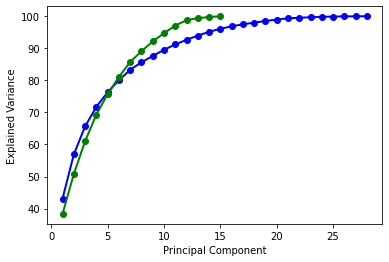

In [32]:
print("Scree Plots:\n")

principalcomponents_1 = np.arange(len(explained_vars_by_df[0])) + 1
principalcomponents_2 = np.arange(len(explained_vars_by_df[1])) + 1

#Dataframe 1 in blue
plt.plot(principalcomponents_1, explained_vars_by_df[0], 'o-', linewidth=2, color='blue')

#Dataframe 2 in green
plt.plot(principalcomponents_2, explained_vars_by_df[1], 'o-', linewidth=2, color='green')

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

From this very insightful scree plot, we can see that the 2 line plots cross each other at 5 PCs. 

In other words, if we wish to choose below 5 PCs, we should use Dataframe 1 (the one with more variables) as there is higher explained variance for the same number of PCs. On the other hand, if we wish to choose more than 5 PCs, we should use Dataframe 2 (the one with less variables).

Since we would like to display our clustering in a plot which can accommodate up to 4 dimensions (x,y,z and size), we will be choosing 4 PCs, and so we should use Dataframe 1.

Step 5: Creating a projection matrix using the first 4 PCs of Dataframe 1.

In [33]:
projmatrix = np.hstack((eigpairs_by_df[0][0][1].reshape(28,1),
                        eigpairs_by_df[0][1][1].reshape(28,1),
                        eigpairs_by_df[0][2][1].reshape(28,1),
                        eigpairs_by_df[0][3][1].reshape(28,1)))

print('projmatrix:\n', projmatrix)

projmatrix:
 [[ 0.16730222 -0.04391569 -0.15660119  0.37632541]
 [-0.21790249 -0.04173594  0.07649457 -0.05690241]
 [-0.10220113 -0.12526376 -0.38032416 -0.41894808]
 [-0.10531786 -0.12525071 -0.37613406 -0.41824607]
 [ 0.11831565 -0.41299486  0.14710264 -0.04755539]
 [ 0.119358   -0.42774591  0.14678964 -0.00814351]
 [-0.16241824 -0.11557631 -0.34469255  0.22534873]
 [ 0.18886599 -0.01525345 -0.19641563  0.02059326]
 [-0.20402806 -0.14469525 -0.23058336  0.11952142]
 [-0.25581271 -0.07589438 -0.02989407  0.16737084]
 [-0.26285374 -0.07585824  0.00745733  0.10188947]
 [ 0.16912494  0.03073303 -0.2377982  -0.06993292]
 [ 0.25960195  0.02609898 -0.11424382  0.10495514]
 [ 0.07238939 -0.43983821  0.09492243 -0.08640243]
 [ 0.15453958 -0.0795289  -0.34891381  0.22244278]
 [ 0.25367639  0.06994641 -0.05369391 -0.13911905]
 [ 0.25397606  0.05841985 -0.04177607 -0.11819344]
 [-0.26778827 -0.05293364 -0.01425425  0.07985401]
 [ 0.23341604  0.04552672  0.15901882 -0.03063037]
 [ 0.09722761 -0.3

Step 6: Projecting the 191 countries onto the new projection matrix.

In [34]:
data4D = scaled_dataframes[0].dot(projmatrix)
data4D

array([[-5.08351253e+00, -4.89436782e-01,  2.06437905e-01,
         6.06914988e-01],
       [ 1.21157733e+00,  1.14056008e+00,  2.64266179e-01,
        -1.98212971e+00],
       [-2.69750411e-01, -1.07938003e-01, -1.49338882e+00,
        -2.11910871e+00],
       [ 3.26066934e+00,  1.27327322e+00,  2.55008830e-01,
         1.12054912e-01],
       [-5.68519960e+00, -1.54324132e+00, -2.30663084e+00,
        -8.72328672e-01],
       [ 1.80646216e+00,  1.52265931e+00,  9.76281049e-01,
         4.41989020e-01],
       [ 2.25490007e+00,  5.40036650e-01, -4.86821841e-01,
        -8.18840710e-01],
       [ 1.13285109e+00,  1.15587886e+00,  3.00033773e-01,
        -1.75848091e+00],
       [ 5.06528189e+00, -1.20319299e+00, -1.38687176e+00,
         1.18565840e+00],
       [ 4.30935029e+00,  5.46175113e-01, -1.96140719e-01,
         8.01916723e-01],
       [ 4.08000247e-01,  5.52999758e-01, -6.18949613e-01,
        -1.03773426e+00],
       [ 1.37190632e+00,  6.17863364e-01, -9.63635444e-01,
      

In [35]:
#check that the length is 191
print(len(data4D))

191


Summing up, we have decided to reduce the dimensions of our dataframe to 4 dimensions. Based on our analysis, Dataframe 1 is more suitable for this. 

Using the first 4 PCs (eigenvectors) of Dataframe 1, which contribute the most to explained variance (71.7% cumulative), we have projected all 191 countries onto this new projection matrix, and now we have the resulting array data4D which is an array of 191 x 4 dimensional data which will be used for clustering, and can even be visualised in a (4D) plot!

In [36]:
%store data4D

Stored 'data4D' (ndarray)
